In [59]:
from alphabet import alphabet
from hopfield import Hopfield
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools

plt.rcParams.update({'font.size': 20})
plt.rc('figure', figsize=(10, 10))
plt.rc('figure', facecolor=(1,1,1,1))

rng = np.random.default_rng(1)

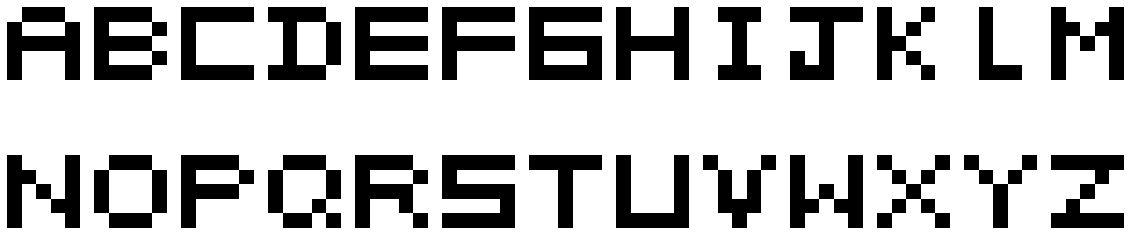

In [60]:
plt.figure("alphabet", figsize=(20,5))

for idx, value in enumerate(alphabet.values()):
    plt.subplot(2, 13, idx+1)
    plt.imshow(1-np.array(value, dtype=np.float32), cmap='gray')
    plt.axis('off')

In [61]:
dim = len(alphabet.values())
distances = np.zeros((dim, dim))
for i, value1 in enumerate(alphabet.values()):
    for j, value2 in enumerate(alphabet.values()):
        l1 = np.array(value1).ravel()
        l2 = np.array(value2).ravel()
        distance = round(
            np.dot(l1, l2)/(np.linalg.norm(l1)*np.linalg.norm(l2)), 2)
        distances[i, j] = distance

In [62]:
groups = list(itertools.combinations(range(len(alphabet)),r=4))

scores = []

for g in groups:

    score = distances[np.ix_(g,g)]
    np.fill_diagonal(score, 0)
    score = score.max()
    #score = np.sum(score)
    #area = len(g)**2 - len(g)
    #score /= 2*area
    scores.append(round(score,2))


data = list(zip(groups, scores))

data = sorted(data, key = lambda x: x[1])

chars = [np.array(list(alphabet.keys()))[list(d[0])] for d in data ]
scores =[d[1] for d in data ]

data2 = list(zip(chars, scores))

df = pd.DataFrame(data2, columns=["Combinación", "Max cos($\theta$)"])

df.head(n=10)



,Combinación,Max cos($\theta$)
0,"[A, L, T, X]",0.36
1,"[K, L, Q, X]",0.37
2,"[K, L, Q, Y]",0.37
3,"[L, T, U, X]",0.37
4,"[L, Q, T, X]",0.38
5,"[K, L, Q, T]",0.42
6,"[K, L, T, X]",0.42
7,"[K, Q, T, V]",0.42
8,"[K, Q, T, X]",0.42
9,"[D, K, M, V]",0.44


In [63]:
idx = list(data[0][0])
c = chars[0]

data2 = distances[np.ix_(idx,idx)]

df = pd.DataFrame(data2, columns=c , index=c)
df.head()

,A,L,T,X
A,1.00,0.20,0.36,0.27
L,0.20,1.00,0.25,0.25
T,0.36,0.25,1.00,0.33
X,0.27,0.25,0.33,1.00


In [64]:
def noise(pattern, p):
    noise = rng.random(patterns.shape[1])
    noise[noise >= p] = 1
    noise[noise < p] = -1
    return noise*pattern

def identify_pattern(patterns, pattern):
    for i,p in enumerate(patterns):
        if not (p-pattern).any():
            return i
    
    return -1

def energy(network, state):
    H = 0
    for i in range(len(state)):
        for j in range(len(state)):
            H += state[i]*state[j]*network.weights[i,j]
    return -H/2



In [65]:
network = Hopfield()

patterns = np.array([ np.array(pattern).ravel() for pattern in alphabet.values()])

chars = chars[0]

idx = list(data[0][0])

patterns = patterns[idx]

patterns[patterns == 0] = -1


In [66]:
network.train(patterns)

In [67]:
fake_states = []
for i in range(2**10):
    idx = i%len(patterns)
    pattern = patterns[idx]
    noise_pattern = noise(pattern, 0.5)
    prediction = network.predict(noise_pattern)
    idx = identify_pattern(patterns, prediction)
    if idx == -1:
        fake_states.append(prediction)

fake_states, count = np.unique(fake_states, axis=0, return_counts=True)

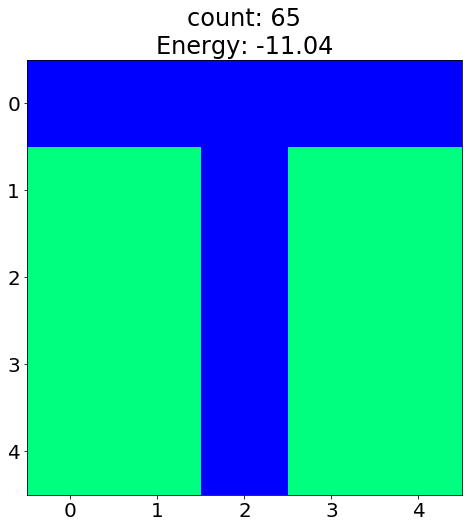

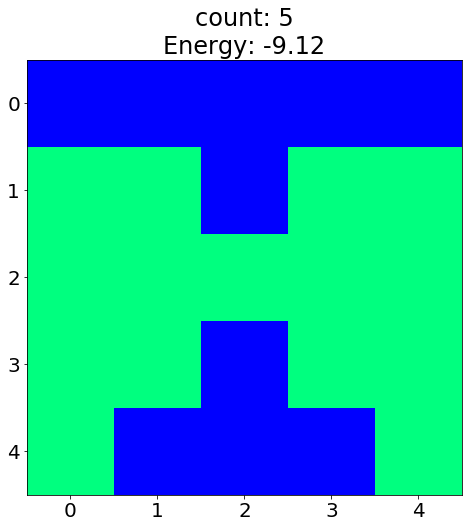

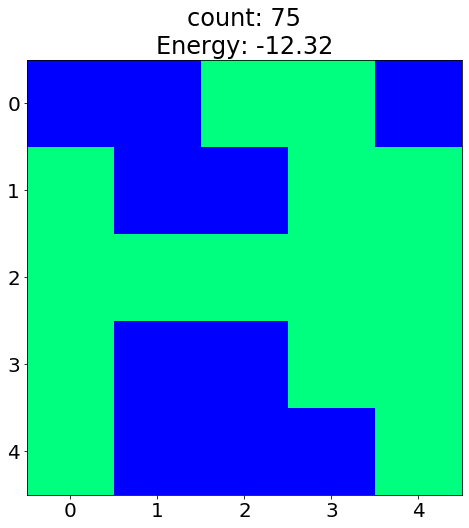

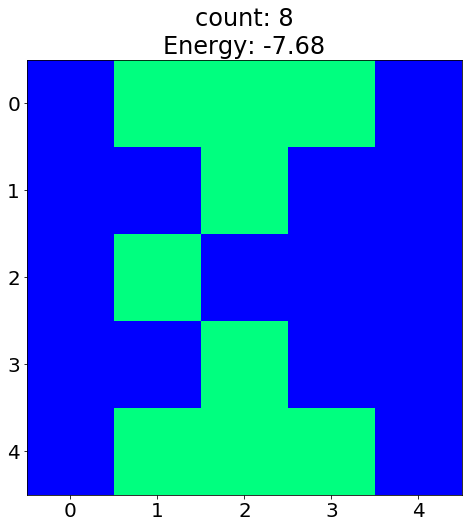

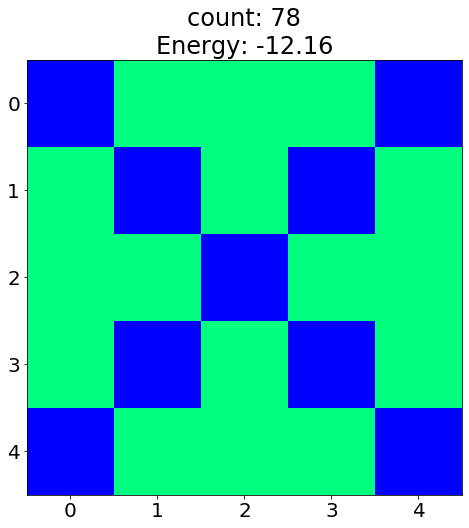

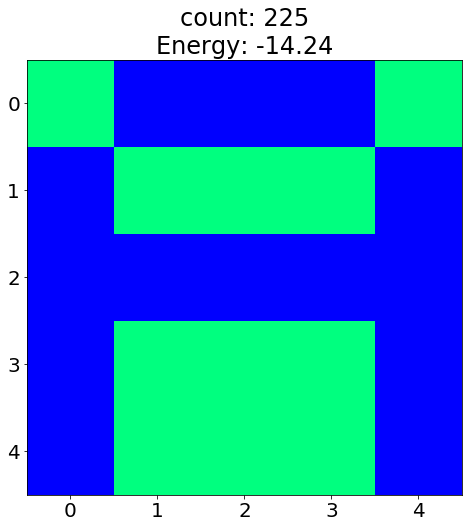

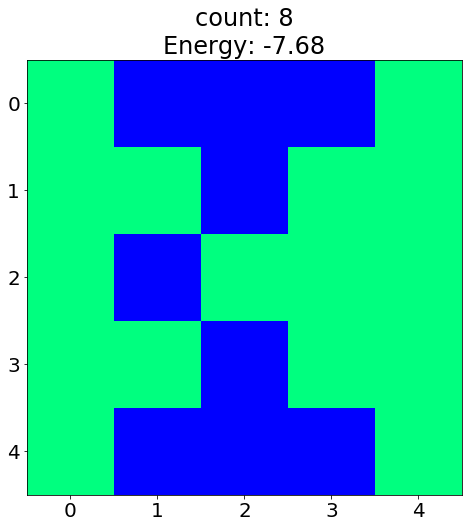

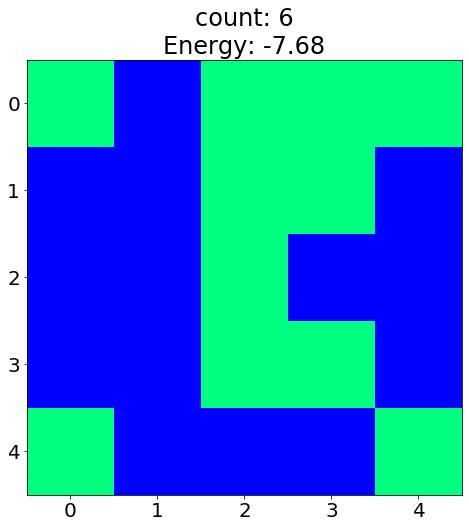

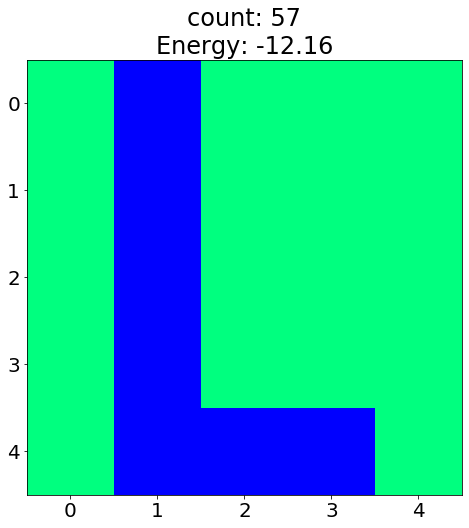

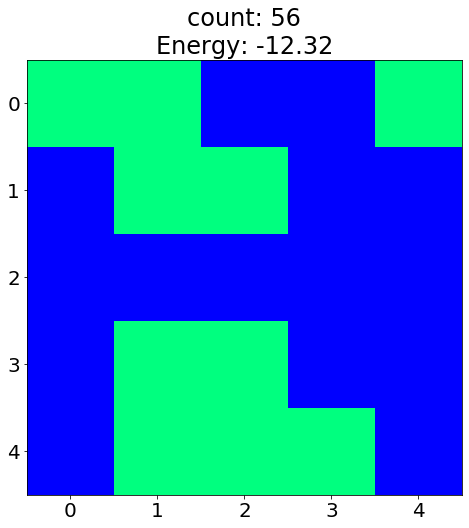

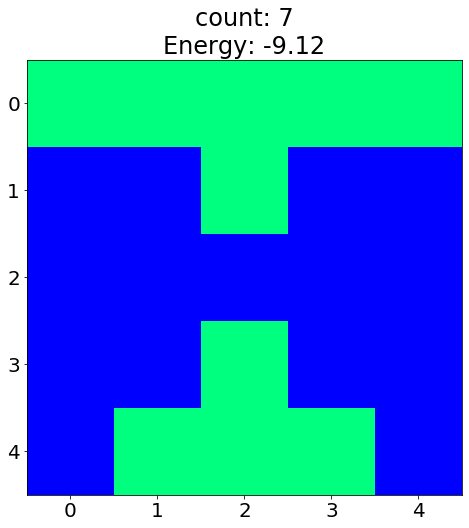

In [68]:
i=0
for state, c in zip(fake_states, count):
    if c < 5:
        continue

    plt.figure(i, figsize=(8,8))
    plt.title("count: " +  str(c)+ "\nEnergy: {:.2f}".format(energy(network, state)))
    plt.imshow(state.reshape(5,5), cmap='winter')
    i+=1
    plt.show()

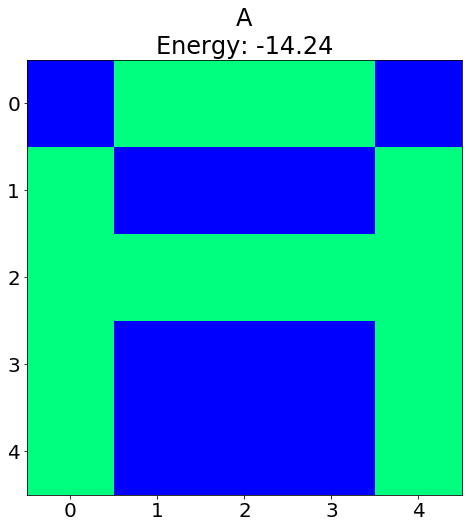

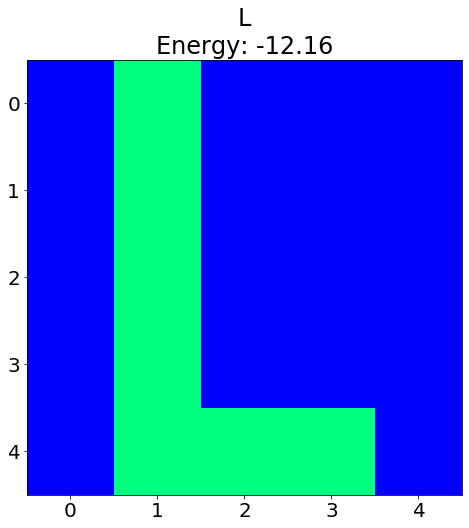

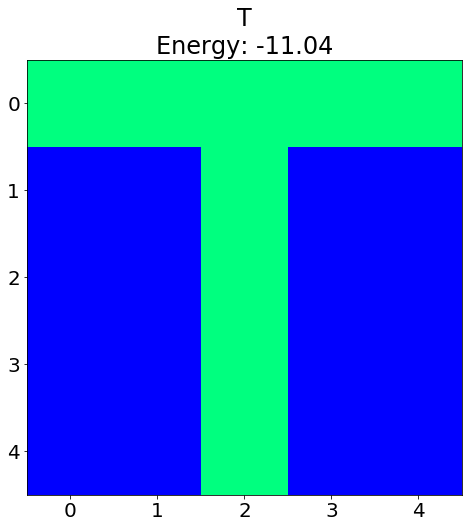

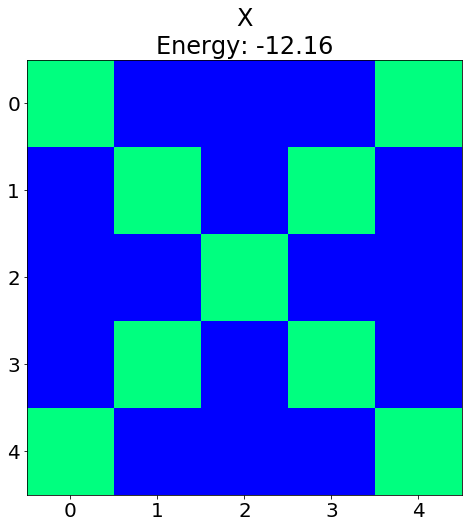

In [69]:
i=0
for c, state in zip(chars, patterns):


    plt.figure(i, figsize=(8,8))
    plt.title(str(c)+ "\nEnergy: {:.2f}".format(energy(network, state)))
    plt.imshow(state.reshape(5,5), cmap='winter')
    i+=1
    plt.show()

In [70]:
energies = []
def callback(network,state):
    energies.append(energy(network, state))

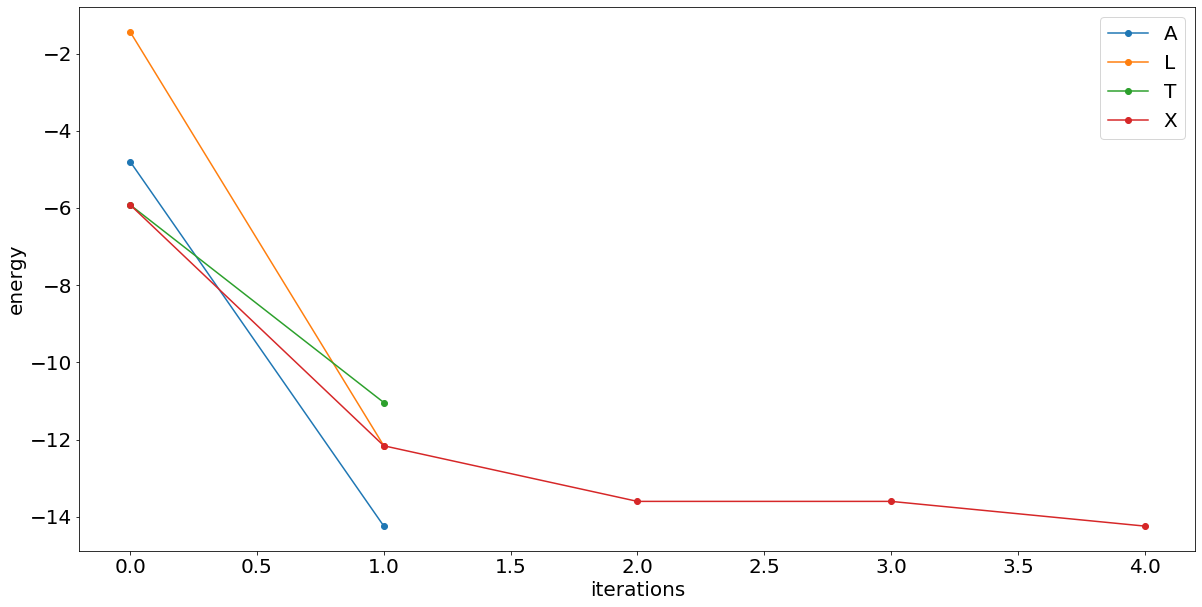

In [71]:
plt.figure("energy patterns",figsize=(20,10))
for c, state in zip(chars, patterns):
    energies = []
    prediction = network.predict(noise(state,0.2), callback)
    plt.plot(energies, "o-", label=str(c))
plt.xlabel("iterations")
plt.ylabel("energy")

plt.legend()
plt.show()

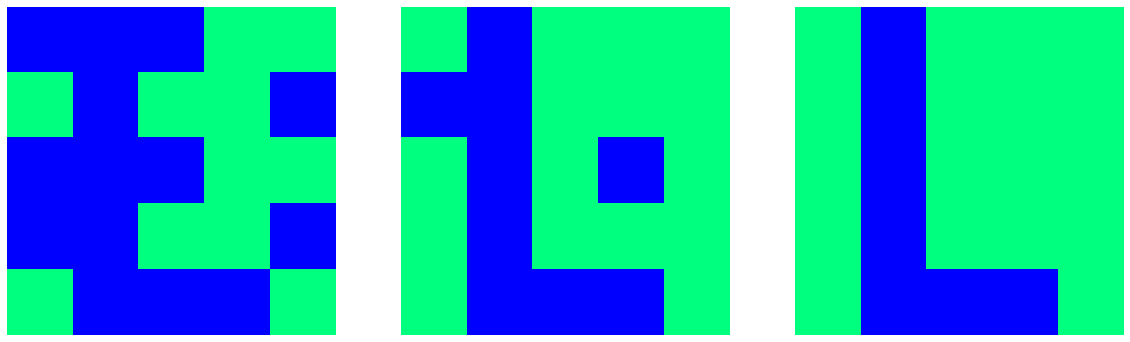

In [88]:
p = patterns[1]
c = chars[1]
i=0

data = []
def callback(network, state):
    data.append(state)

network.predict(noise(p,0.5),callback)

fig,ax = plt.subplots(1, len(data),figsize=(20,10))

for i,d in enumerate(data):
    ax[i].imshow(d.reshape(5,5), cmap='winter')
    ax[i].set_axis_off()
    
    